In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
f = open('inputs/day03.txt')
data = f.read().split('\n')

In [3]:
class Grid:
    
    def __init__(self, x, y):
        self.grid = pd.DataFrame(np.zeros((x, y)))
        self.claims = []
        
    def plot(self, ax=None):
        ax = ax or plt.gca()
        sns.heatmap(self.grid, ax=ax)
        
    def parse(self, input):
        for line in input:
            claim = Claim(line)
            self.claims.append(claim)
            self.register_claim(claim)
            
    def register_claim(self, claim):
        x, y, w, t = claim.x, claim.y, claim.wide, claim.tall
        self.grid.loc[x:(x+w-1), y:(y+t-1)] += 1
        
    def overlap(self, claim):
        x, y, w, t = claim.x, claim.y, claim.wide, claim.tall
        return any((self.grid.loc[x:(x+w-1), y:(y+t-1)] >= 2).any())
    
class Claim:
    
    def __init__(self, input):
        self.input = input
        self.parse()
        
    def __str__(self):
        return self.input
        
    def __repr__(self):
        return str(self)

    def parse(self):
        units = self.input.split(' ')
        self.id = int(units[0].replace('#', ''))
        
        units[2] = units[2].replace(':','').split(',')
        self.x = int(units[2][0])
        self.y = int(units[2][1])
        
        units[3] = units[3].split('x')
        self.wide = int(units[3][0])
        self.tall = int(units[3][1])

In [4]:
g = Grid(1000, 1000)
g.parse(data)

# Part 1

Count the overalapping sections of the grid

In [5]:
sum((g.grid >= 2).sum())

121163

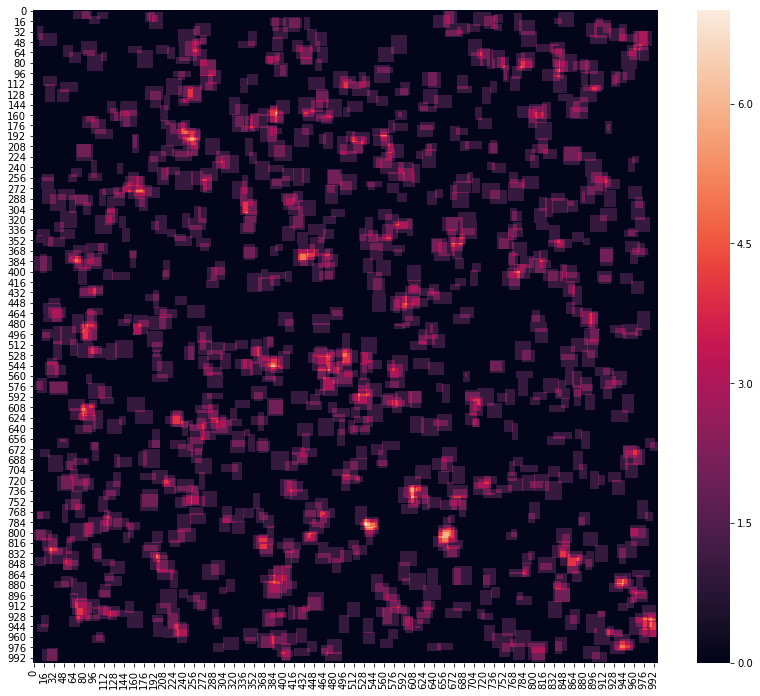

In [6]:
fig, ax = plt.subplots(figsize=(14, 12))
g.plot(ax=ax)

# Part 2

Find the single non-overlapping claim

In [7]:
x = [not g.overlap(c) for c in g.claims]

In [8]:
pd.Series(g.claims)[x]

942    #943 @ 235,134: 16x11
dtype: object